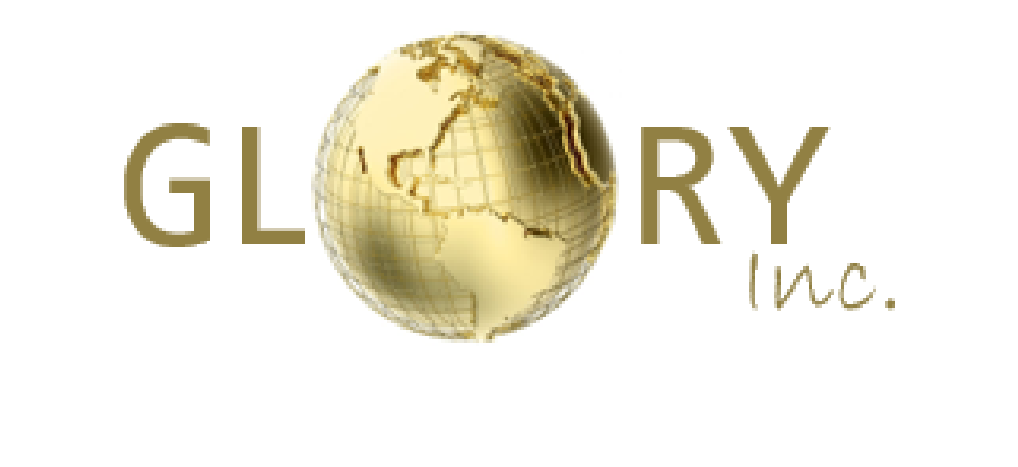

In [53]:
img=plt.imread('Logo Glory Inc..png')
plt.axis('off')
plt.imshow(img)
plt.show()

## Import Libraries ##

In [2]:
import numpy as np
import pandas as pd

import scipy

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA #for dimensional reduction

from mpl_toolkits.mplot3d import axes3d

## Import Dataset ##

In [3]:
original=pd.read_excel('Glory_Customer_Info.xlsx')
original.head()

,Customer_Id,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


***Every customer is represented by an ID number. Each line here represents an observation on a customer in the day he got into the store (we could have a bunch of observations for a single customer). Let's confirm this by counting the number of distinct customers.***

***Find below the dictionary of variables used in this dataset***

CustomerData - Legend										
The dataset consists of information about the purchases of chocolate candy bars of 500 individuals from a given area when entering a physical ‘FMCG’ store in the period of 2 years. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymized to protect the privacy of the customers. 								
Customer_Id	numerical	Integer	Shows a unique identificator of a customer.							
										
Day	numerical	Integer	Day when the customer has visited the store 							
										
Incidence	categorical	{0,1}	Purchase Incidence							
		0	The customer has not purchased an item from the category of interest 							
		1	The customer has purchased an item from the category of interest 							
										
Brand	categorical	{0,1,2,3,4,5}	Shows which brand the customer has purchased							
		0	No brand was purchased							
		1,2,3,4,5	Brand ID							
										
Quantity	numerical	integer	Number of items bought by the customer from the product category of interest							
										
Last_Inc_Brand	categorical	{0,1,2,3,4,5}	Shows which brand the customer has purchased on their previous store visit							
		0	No brand was purchased							
		1,2,3,4,5	Brand ID							
										
Last_Inc_Quantity	numerical	integer	Number of items bought by the customer from the product category of interest during their previous store visit							
										
Price_1	numerical	real	Price of an item from Brand 1 on a particular day							
										
Price_2	numerical	real	Price of an item from Brand 2 on a particular day							
										
Price_3	numerical	real	Price of an item from Brand 3 on a particular day							
										
Price_4	numerical	real	Price of an item from Brand 4 on a particular day							
										
Price_5	numerical	real	Price of an item from Brand 5 on a particular day							
										
Promotion_1	categorical	{0,1}	Indicator whether Brand 1 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_2	categorical	{0,1}	Indicator of whether Brand 2 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_3	categorical	{0,1}	Indicator of whether Brand 3 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_4	categorical	{0,1}	Indicator of whether Brand 4 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_5	categorical	{0,1}	Indicator of whether Brand 5 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.							
		0	male							
		1	female							
										
Marital status	categorical	{0,1}	Marital status of a customer.							
		0	single							
		1	non-single (divorced / separated / married / widowed)							
										
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset							
		18	Min value (the lowest age observed in the dataset)							
		75	Max value (the highest age observed in the dataset)							
										
Education	categorical	{0,1,2,3}	Level of education of the customer							
		0	other / unknown							
		1	high school							
		2	university							
		3	graduate school							
										
Income	numerical	real	Self-reported annual income in US dollars of the customer.							
		38247	Min value (the lowest income observed in the dataset)							
		309364	Max value (the highest income observed in the dataset)							
										
Occupation	categorical	{0,1,2}	Category of occupation of the customer.							
		0	unemployed / unskilled							
		1	skilled employee / official							
		2	management / self-employed / highly qualified employee / officer							
										
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.							
		0	small city							
		1	mid-sized city							
		2	big city							


## Data Cleansing ##

In [4]:
original.isnull().sum().sum()

0

***Dataset is good to be used as it doesn't show any empty cell***

In [5]:
nber_customers=original['Customer_Id'].nunique()
print('There are ',nber_customers, ' distinct customers in the dataset')

There are  500  distinct customers in the dataset


***This shows that we have exactly 500 distincts customers in the dataset.***
## Let's group informations per customer ## 
*(Each line will then represents a record for each customer)*

***For the purpose of the present analyse, we will drop all columns of prices and promotions*** *for the final version of dataset that we'll be using for the rest of analyze.*

In [6]:
dataset_day=original[['Customer_Id','Day']].groupby(['Customer_Id'], as_index=False).count()
dataset_day=dataset_day.set_index('Customer_Id')
dataset_day=dataset_day.rename(columns={'Day':'Nber_Visits'})

dataset_purchase=original[['Customer_Id','Incidence']].groupby(['Customer_Id'], as_index=False).sum()
dataset_purchase=dataset_purchase.set_index('Customer_Id')
dataset_purchase=dataset_purchase.rename(columns={'Incidence':'Nber_Purchase'})

dataset=dataset_day.join(dataset_purchase)

dataset['Pct_Purchase']=(dataset['Nber_Purchase']/dataset['Nber_Visits'])*100

dataset_qty=original[['Customer_Id','Quantity']].groupby(['Customer_Id']).mean()
dataset_sex=original[['Customer_Id','Sex']].groupby(['Customer_Id']).mean()
dataset_marital=original[['Customer_Id','Marital status']].groupby(['Customer_Id']).mean()
dataset_age=original[['Customer_Id','Age']].groupby(['Customer_Id']).mean()
dataset_education=original[['Customer_Id','Education']].groupby(['Customer_Id']).mean()
dataset_income=original[['Customer_Id','Income']].groupby(['Customer_Id']).mean()
dataset_occupation=original[['Customer_Id','Occupation']].groupby(['Customer_Id']).mean()
dataset_settlement=original[['Customer_Id','Settlement size']].groupby(['Customer_Id']).mean()

dataset=dataset.join([dataset_qty,dataset_sex,dataset_marital,dataset_age,dataset_education,dataset_income,dataset_occupation,dataset_settlement])
dataset.head()


,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Customer_Id,,,,,,,,,,,
200000001,101,9,8.910891,0.178218,0,0,47,1,110866,1,0
200000002,87,11,12.643678,0.229885,1,1,52,2,159052,2,1
200000003,97,10,10.309278,0.185567,0,0,28,0,113212,1,0
200000004,85,11,12.941176,0.152941,0,0,37,1,119602,0,0
200000005,111,13,11.711712,0.189189,0,0,49,1,121466,1,2


In [7]:
dataset.shape

(500, 11)

***This is 500 rows reprensenting informations about each customers***

# EDA #

In [8]:
dataset.isnull().sum()

Nber_Visits        0
Nber_Purchase      0
Pct_Purchase       0
Quantity           0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

***Dataset doesn't have empty cell and it's then ready to be used***

*let's get the type of different fields*

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 200000001 to 200000500
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nber_Visits      500 non-null    int64  
 1   Nber_Purchase    500 non-null    int64  
 2   Pct_Purchase     500 non-null    float64
 3   Quantity         500 non-null    float64
 4   Sex              500 non-null    int64  
 5   Marital status   500 non-null    int64  
 6   Age              500 non-null    int64  
 7   Education        500 non-null    int64  
 8   Income           500 non-null    int64  
 9   Occupation       500 non-null    int64  
 10  Settlement size  500 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 66.9 KB


In [10]:
dataset.describe()

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,117.386000,29.276000,23.807165,0.675866,0.388000,0.392000,38.676000,1.096000,121520.162000,0.768000,0.638000
std,26.680793,30.674642,15.721648,0.604650,0.487783,0.488686,12.191977,0.660042,41061.953449,0.671624,0.792599
min,72.000000,6.000000,4.615385,0.090090,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,103.000000,15.000000,13.320312,0.319646,0.000000,0.000000,29.000000,1.000000,95040.000000,0.000000,0.000000
50%,114.000000,21.000000,18.423301,0.535758,0.000000,0.000000,36.000000,1.000000,117804.500000,1.000000,0.000000
75%,125.000000,34.000000,30.734649,0.815789,1.000000,1.000000,46.000000,1.000000,137190.750000,1.000000,1.000000
max,358.000000,327.000000,92.219020,5.360000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


***Let's define correlation and plot it for better readability***

In [11]:
dataset.corr()

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Nber_Visits,1.000000,0.703919,0.317639,0.117437,-0.019076,0.010043,0.042653,0.037265,0.034515,0.040683,0.099585
Nber_Purchase,0.703919,1.000000,0.842808,0.549215,-0.060210,-0.013382,0.131063,0.079754,0.120787,0.110310,0.192462
Pct_Purchase,0.317639,0.842808,1.000000,0.751248,-0.053217,0.018446,0.164340,0.111307,0.169243,0.144717,0.222106
Quantity,0.117437,0.549215,0.751248,1.000000,0.012510,0.049908,0.107068,0.098827,0.138347,0.102109,0.145419
Sex,-0.019076,-0.060210,-0.053217,0.012510,1.000000,0.445170,-0.114957,0.201523,-0.090527,-0.085591,-0.200973
Marital status,0.010043,-0.013382,0.018446,0.049908,0.445170,1.000000,-0.112845,0.398772,0.082172,0.094469,0.067012
Age,0.042653,0.131063,0.164340,0.107068,-0.114957,-0.112845,1.000000,0.688460,0.376813,0.182431,0.204553
Education,0.037265,0.079754,0.111307,0.098827,0.201523,0.398772,0.688460,1.000000,0.353610,0.195003,0.219788
Income,0.034515,0.120787,0.169243,0.138347,-0.090527,0.082172,0.376813,0.353610,1.000000,0.716283,0.504969
Occupation,0.040683,0.110310,0.144717,0.102109,-0.085591,0.094469,0.182431,0.195003,0.716283,1.000000,0.572251


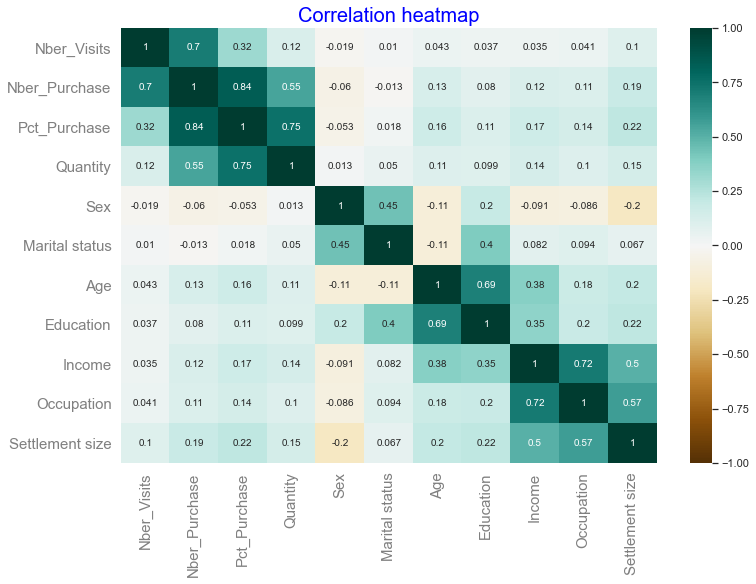

In [12]:
plt.figure(figsize=(12,8))
heatmap=sns.heatmap(dataset.corr(),annot=True,cmap='BrBG',vmin= -1,vmax=1)
plt.title('Correlation heatmap',color='blue', fontsize=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(),color='grey',rotation=90, fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(),color='grey',rotation=0, fontsize=15)
plt.show()

***There is positive correlation between:***

***Income and Settlement size*** (*People working tend to live not too far from their job's place*).

***Income and Occupation*** (*The amount of income is obviously related to the level of responsabilities*).

***Occupation and Settlement size*** (*as at the first reason*).

***Marital status and Education*** (*people get married once ended up with school and found a job*).

***Age and Education*** (*more educated people are not more young*).


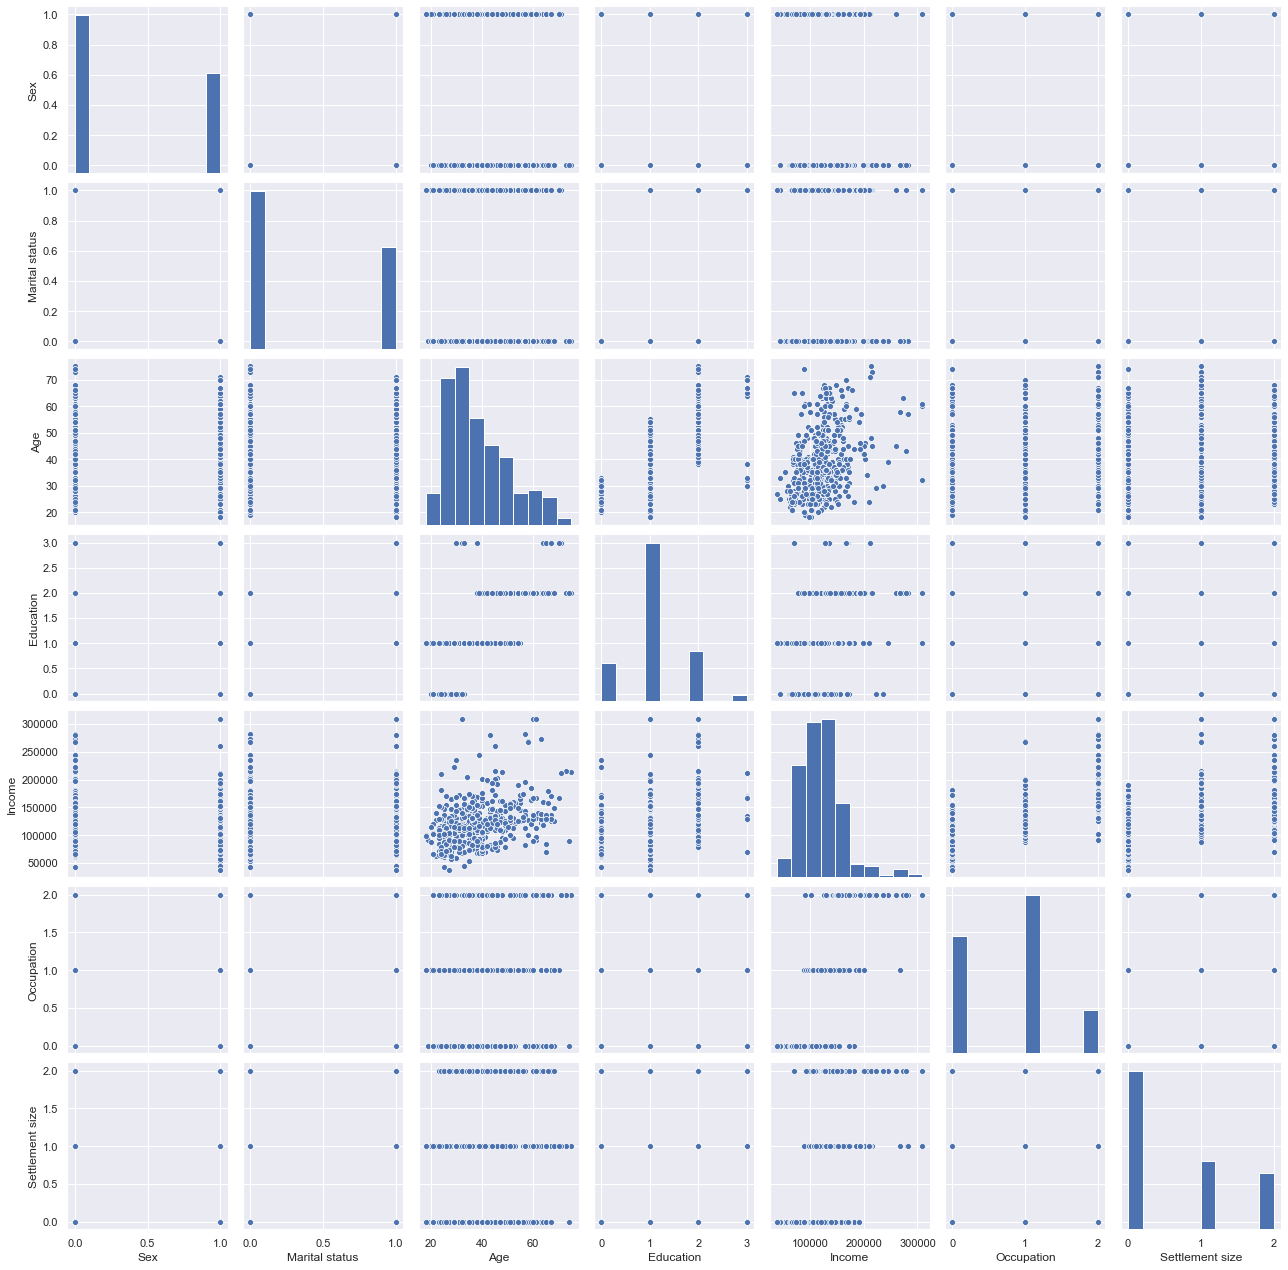

In [13]:
sns.pairplot(dataset.drop(['Nber_Visits','Nber_Purchase','Pct_Purchase','Quantity'],axis=1))
plt.show()

***There is a positive correlation between income and age as well***

**Let's zoom it out for better view.**

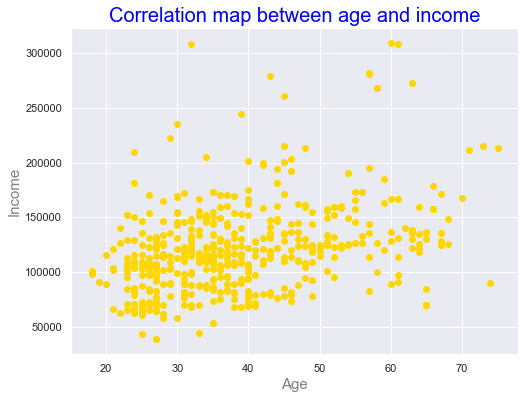

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(dataset.iloc[:,6],dataset.iloc[:,8],color='gold')
plt.xlabel('Age',color='grey',fontsize=15)
plt.ylabel('Income',color='grey',fontsize=15)
plt.title('Correlation map between age and income', fontsize=20, color='Blue')
plt.show()

***People aged more are people with more level of experience and they tend to earn more***.

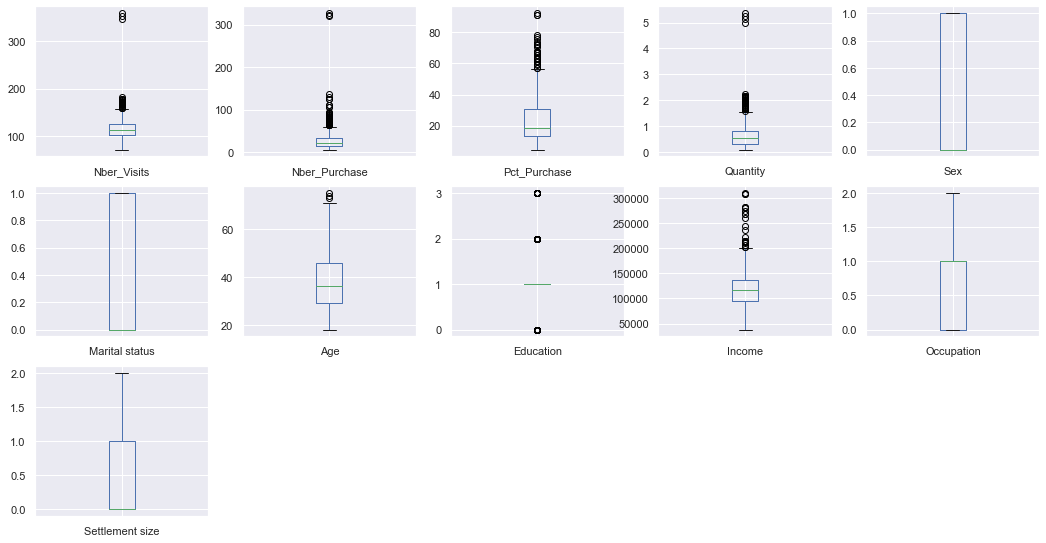

In [15]:
plt.rcParams['figure.figsize'] = [18, 16]
dataset.plot(kind='box',subplots=True,layout=(5,5), sharex=False, sharey=False)
plt.tight_layout
plt.show()

## Some facts ##

**1. Number of purchase is quite low compared to number of visits.( They visit more, but they buy less in general and the quantity bought is small for many of them);**

**2. Most of our customers live in small and mid-size cities; The big part of them are male and they're around 29 and 46 years old and are high school students.**

**Based on these facts, we'll perform a demographic segmentation to include our customers in differents clusters with features that we would leverage on to drive more incidences, thus more revenues.**

## SEGMENTATION MODEL ##
How many clusters could be found (Hierarchical clustering)

To be able to do so, we first of all need to standardize the dataset. (***There is no categorical variables in dataset, then no need to encode or to drop any of them***)

In [16]:
dataset_std=StandardScaler().fit_transform(dataset)
dataset_std

array([[-0.61476473, -0.66166399, -0.9484497 , ..., -0.2597254 ,
         0.34577757, -0.8057534 ],
       [-1.14001227, -0.59639826, -0.71078217, ...,  0.91494493,
         1.83619812,  0.45718296],
       [-0.76483545, -0.62903113, -0.85941402, ..., -0.202535  ,
         0.34577757, -0.8057534 ],
       ...,
       [ 0.51076571,  0.31732199,  0.37971845, ..., -0.16421304,
         0.34577757, -0.8057534 ],
       [-0.42717632,  0.05625906,  0.34624639, ..., -1.17633197,
        -1.14464299, -0.8057534 ],
       [ 0.24814194, -0.4658668 , -0.74560368, ..., -0.01399683,
         0.34577757, -0.8057534 ]])

***Let's build a dendrogram from this to visualize the number of clusters***

In [17]:
hier_cluster=linkage(dataset_std,method='ward')# This line return the linkage matrix

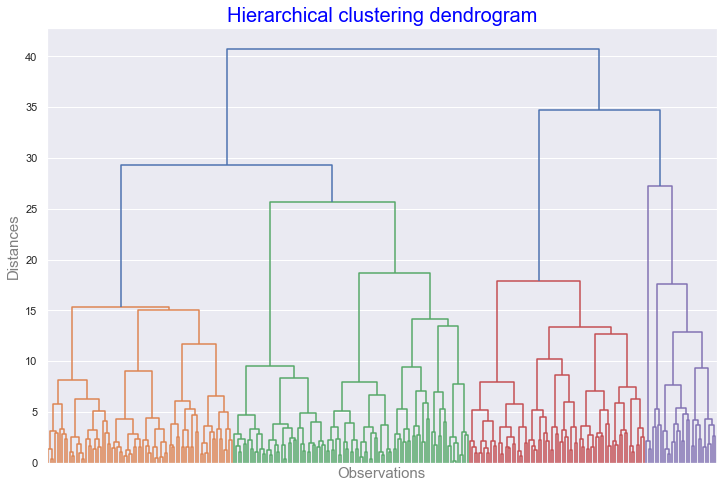

In [18]:
plt.figure(figsize=(12,8))
dendrogram(hier_cluster,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=8)
plt.title('Hierarchical clustering dendrogram', color='blue', fontsize=20)
plt.xlabel('Observations', color='grey', fontsize=15)
plt.ylabel('Distances', color='grey', fontsize=15)
plt.show()

***Dendrogram above shows that, Glory's customers could be separated in 4 different clusters.***

## Let's perform this clustering using KMeans Method. ##

***This will help to identify different clusters and get more information from them***

In [19]:
wcss=[]   # To initialize the Within Clusters Sum of Square
for i in range(1,13): # This will help to run the code 12 times
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(dataset_std)
    wcss.append(kmeans.inertia_)

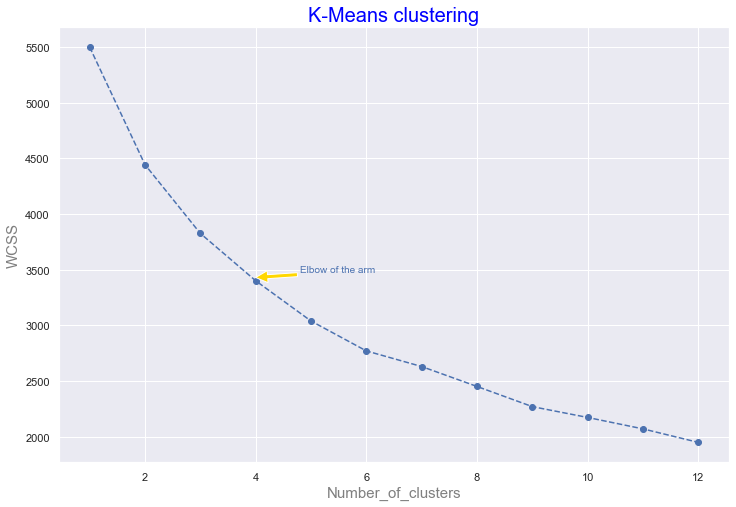

In [20]:
plt.figure(figsize=(12,8))
plt.plot(range(1,13),wcss,marker='o',linestyle='--')
plt.xlabel('Number_of_clusters', fontsize=15,color='grey')
plt.ylabel('WCSS', fontsize=15,color='grey')
plt.title('K-Means clustering', fontsize=20,color='blue')
plt.annotate('Elbow of the arm',xy=(4,3430),xytext=(4+0.8,3475),arrowprops=dict(facecolor='Gold'),color ='b')
plt.show()

***Elbow method confirms the number of clusters***

## **Let's perform KMeans clustering with 4 clusters** ##

In [21]:
kmeans=KMeans(n_clusters=4,init='k-means++', random_state=42)
kmeans.fit(dataset_std)

KMeans(n_clusters=4, random_state=42)

In [22]:
dataset_segm_kmeans=dataset.copy()
dataset_segm_kmeans['segment k-means']=kmeans.labels_ # to add segment k-means column

dataset_segm_analysis=dataset_segm_kmeans.groupby(['segment k-means']).mean()
dataset_segm_analysis

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment k-means,,,,,,,,,,,
0,153.902439,101.731707,63.461563,1.806346,0.317073,0.414634,44.731707,1.292683,141805.219512,1.097561,1.243902
1,114.291667,24.466667,21.970422,0.561037,0.125000,0.341667,47.041667,1.458333,162532.666667,1.441667,1.516667
2,115.898551,23.195652,20.355690,0.624754,0.746377,1.000000,33.282609,1.253623,107669.260870,0.594203,0.427536
3,112.805970,21.542289,19.184690,0.548918,0.313433,0.000000,36.149254,0.731343,102406.910448,0.417910,0.134328


**We need to know how many customers are in each cluster**

Let's introduce 2 columns in dataset_segm_analysis table.
1. Number of customers: Num_customer
2. Proportion per segment: Prop_customer (%)

In [23]:
dataset_segm_analysis['Num_customer']=dataset_segm_kmeans[['segment k-means','Age']].groupby(['segment k-means']).count()
dataset_segm_analysis['Prop_customer (%)']=(dataset_segm_analysis['Num_customer']/dataset_segm_analysis['Num_customer'].sum())*100
dataset_segm_analysis

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num_customer,Prop_customer (%)
segment k-means,,,,,,,,,,,,,
0,153.902439,101.731707,63.461563,1.806346,0.317073,0.414634,44.731707,1.292683,141805.219512,1.097561,1.243902,41,8.2
1,114.291667,24.466667,21.970422,0.561037,0.125000,0.341667,47.041667,1.458333,162532.666667,1.441667,1.516667,120,24.0
2,115.898551,23.195652,20.355690,0.624754,0.746377,1.000000,33.282609,1.253623,107669.260870,0.594203,0.427536,138,27.6
3,112.805970,21.542289,19.184690,0.548918,0.313433,0.000000,36.149254,0.731343,102406.910448,0.417910,0.134328,201,40.2


Just to check if the number of customer match with the dataset.

In [24]:
print(dataset_segm_analysis.iloc[:,11].sum())

500


Exactly...

***We now need to identify each segment by a proper name based on the observed features***

***Segment 0*** *are people with the higher number of visits, they are the one with higher incidence, purchasing the higher
                 quantity of products. Most of them are male with income around the average of customers. They went in high 
                 school and most of them are single, skilled employee/official and live in mid-size city. They represent the few
                 proportion of customers: Let's call them*  ***Career_Minded***

***Segment 1*** *visits around the median of visits number, and they purchase around the median of number of purchase. They buy
                 less in terms of quantity. These are single male for the most of them and the most older of customers. They 
                 gratuated from university and get the higher income amongst customers. They are officer, self employed, manager
                 and they live in big city: these are* ***Wealthy_People***

***Segment 2*** *visits and purchase in average. They are all married, younger and went to high school. They live in small city
                 and most of them are unemployed.* ***Classic_People***

***Segment 3*** *is for non married people, graduated at most in high school, unemployed and living in small city. They 
                 constitute the biggest proportion of customers.* ***Low_Access***

**Let's now call each segment by its name**

In [25]:
dictionary_name={0:'Career_Minded',1:'Wealthy_People',2:'Classic_People',3:'Low_Access'}
dataset_segm_analysis.rename(dictionary_name)

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num_customer,Prop_customer (%)
segment k-means,,,,,,,,,,,,,
Career_Minded,153.902439,101.731707,63.461563,1.806346,0.317073,0.414634,44.731707,1.292683,141805.219512,1.097561,1.243902,41,8.2
Wealthy_People,114.291667,24.466667,21.970422,0.561037,0.125000,0.341667,47.041667,1.458333,162532.666667,1.441667,1.516667,120,24.0
Classic_People,115.898551,23.195652,20.355690,0.624754,0.746377,1.000000,33.282609,1.253623,107669.260870,0.594203,0.427536,138,27.6
Low_Access,112.805970,21.542289,19.184690,0.548918,0.313433,0.000000,36.149254,0.731343,102406.910448,0.417910,0.134328,201,40.2


***Let's assign a cluster to each customer***

In [26]:
dataset_with_clusters= pd.concat([dataset, pd.DataFrame(dataset_segm_kmeans['segment k-means'])], axis = 1)
dataset_with_clusters

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment k-means
Customer_Id,,,,,,,,,,,,
200000001,101,9,8.910891,0.178218,0,0,47,1,110866,1,0,3
200000002,87,11,12.643678,0.229885,1,1,52,2,159052,2,1,1
200000003,97,10,10.309278,0.185567,0,0,28,0,113212,1,0,3
200000004,85,11,12.941176,0.152941,0,0,37,1,119602,0,0,3
200000005,111,13,11.711712,0.189189,0,0,49,1,121466,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200000496,120,20,16.666667,0.408333,1,1,26,1,71021,0,0,2
200000497,120,43,35.833333,2.066667,0,0,60,2,89374,0,0,3
200000498,131,39,29.770992,0.954198,1,1,29,1,114784,1,0,2


***Let's see how different variables are distributed troughout customers population***

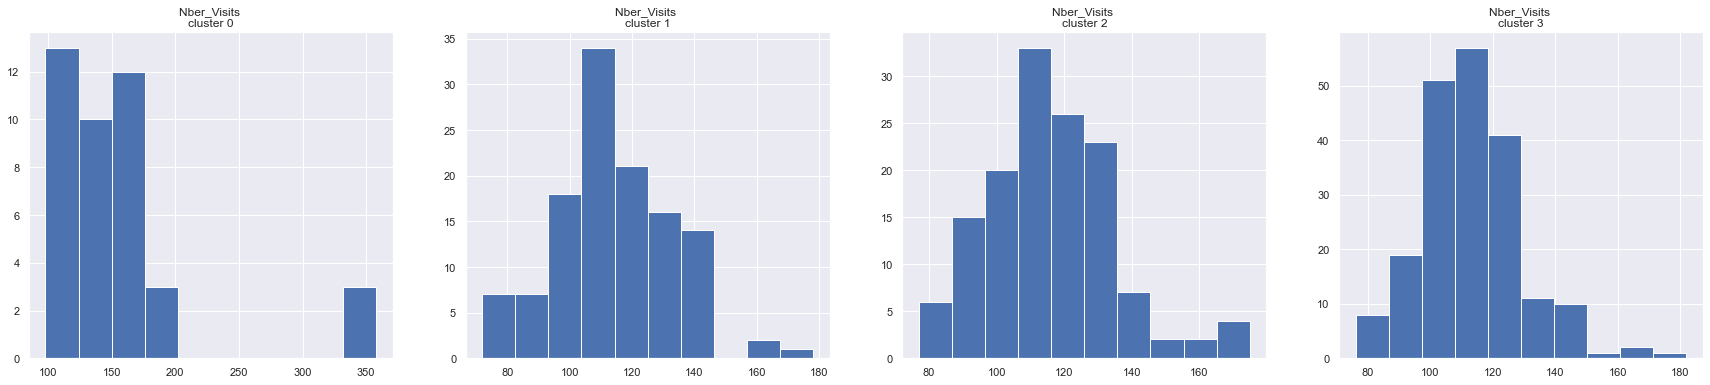

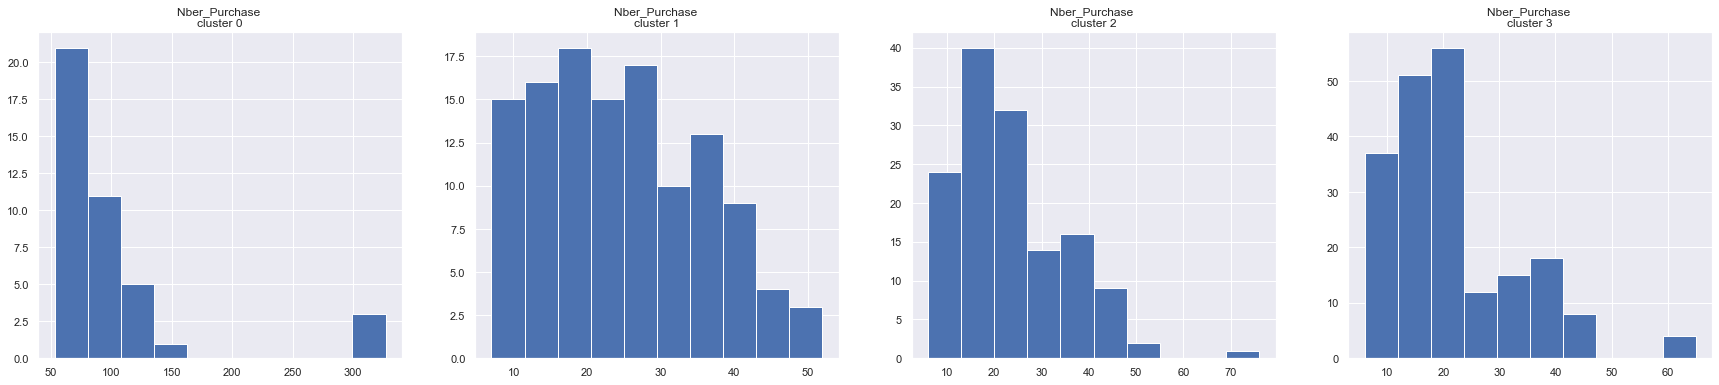

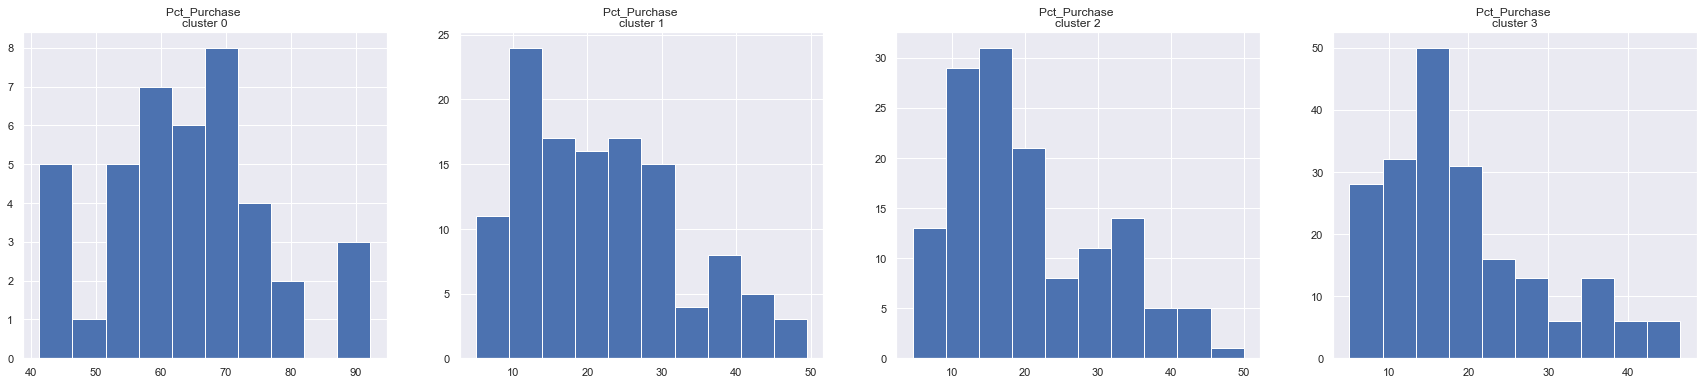

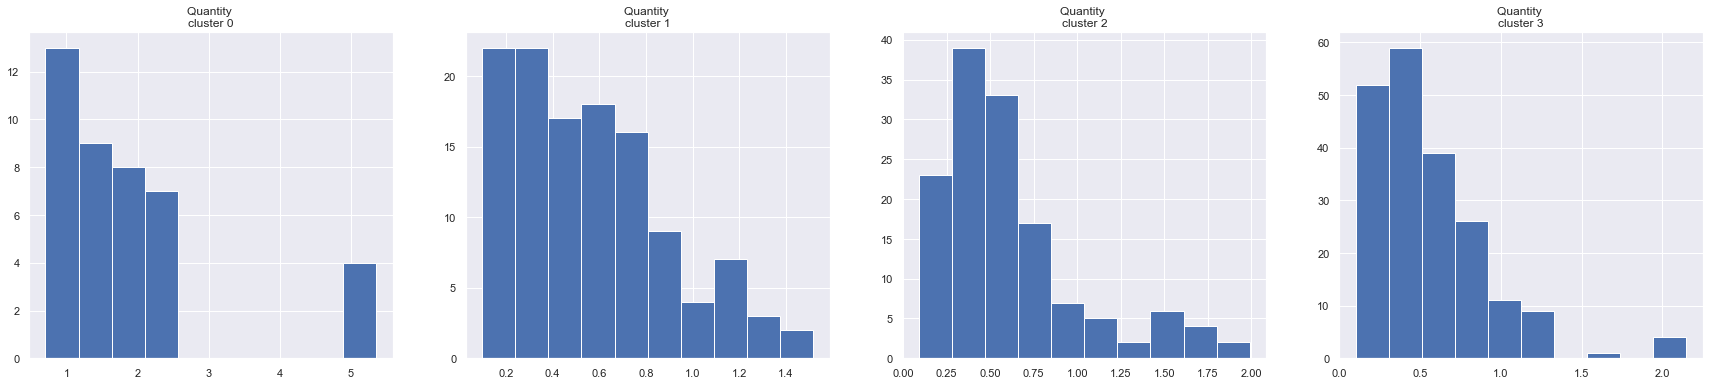

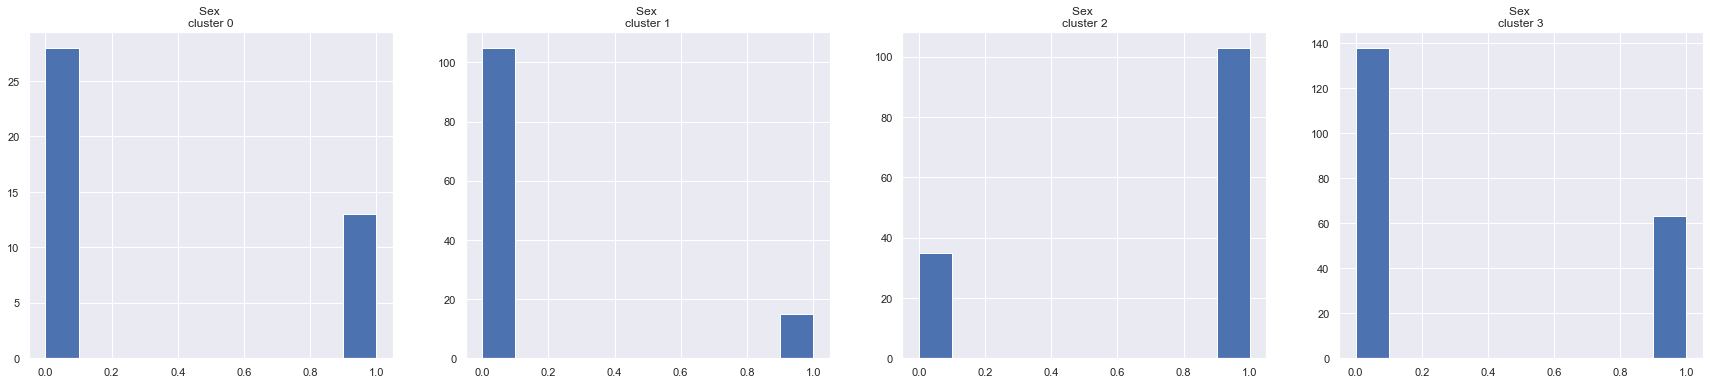

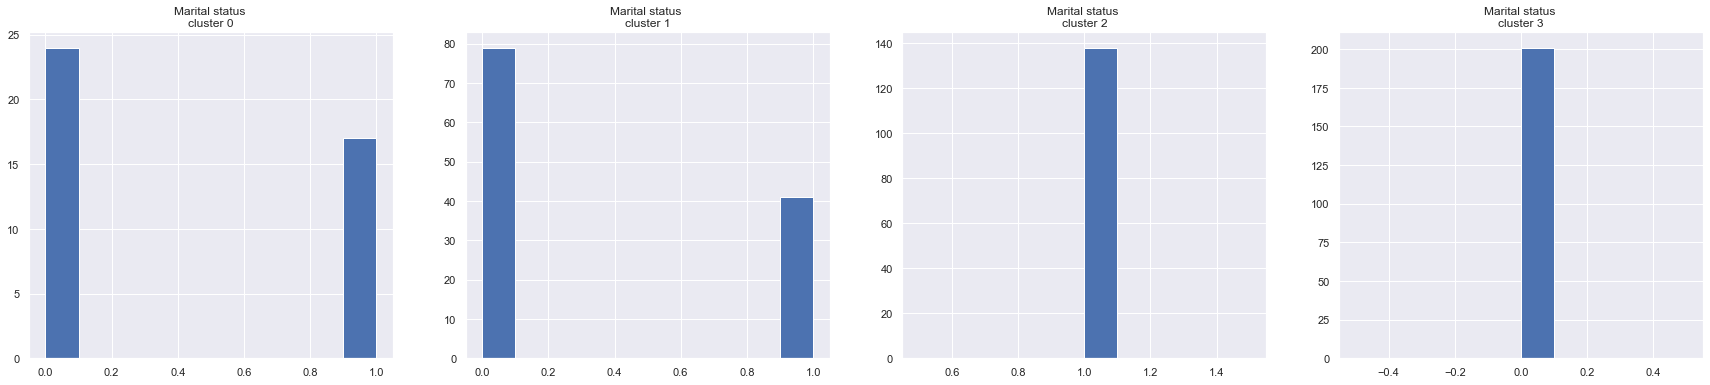

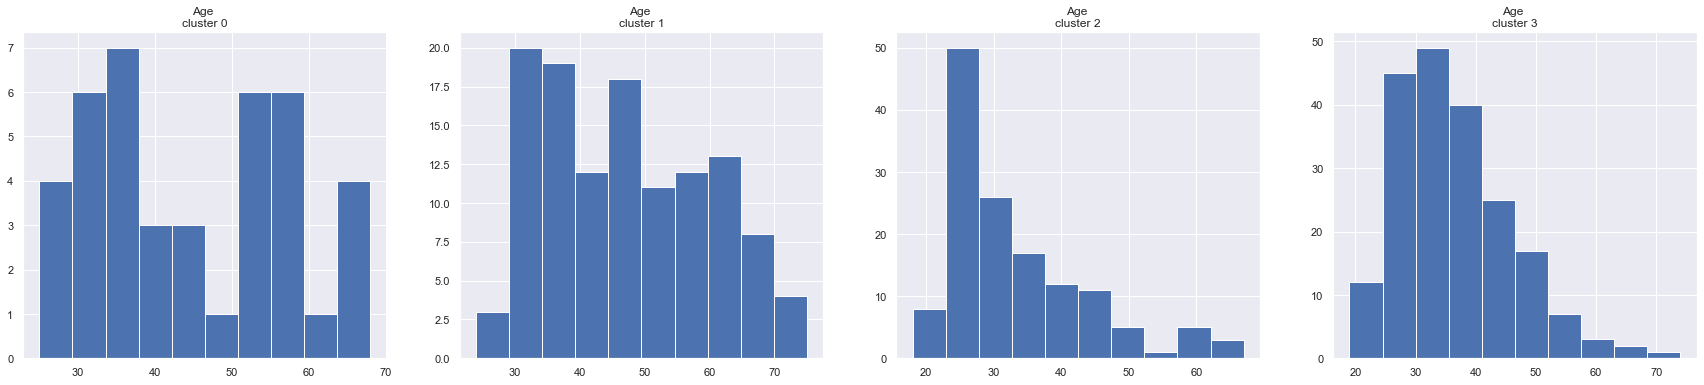

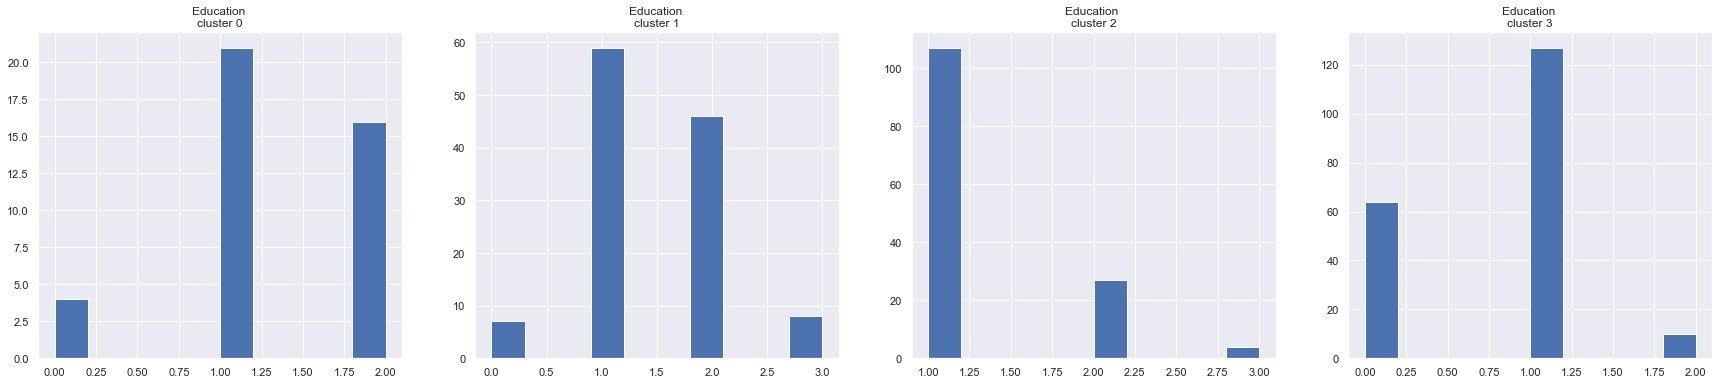

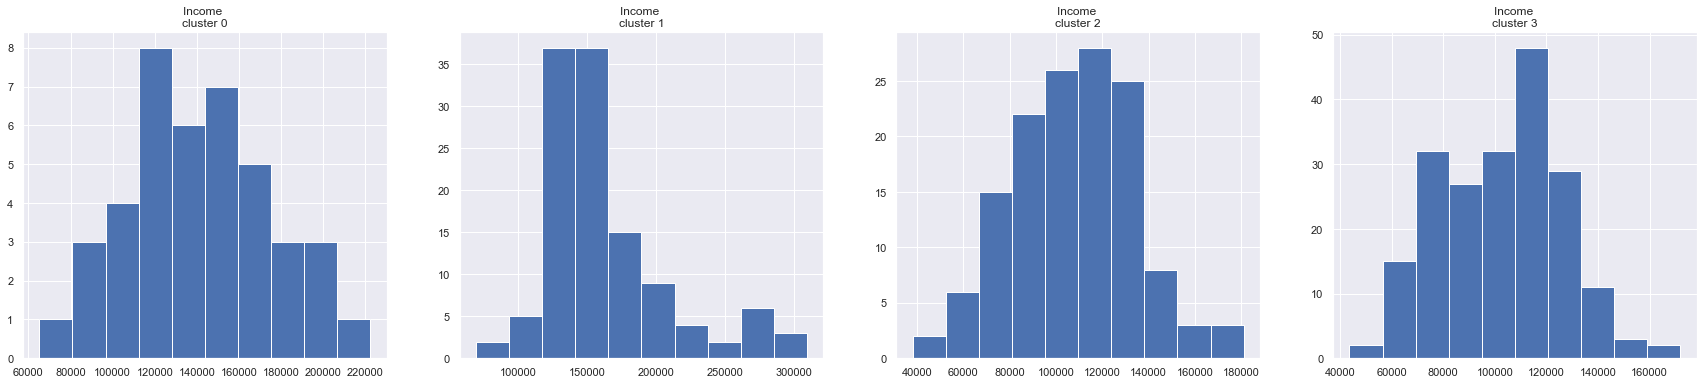

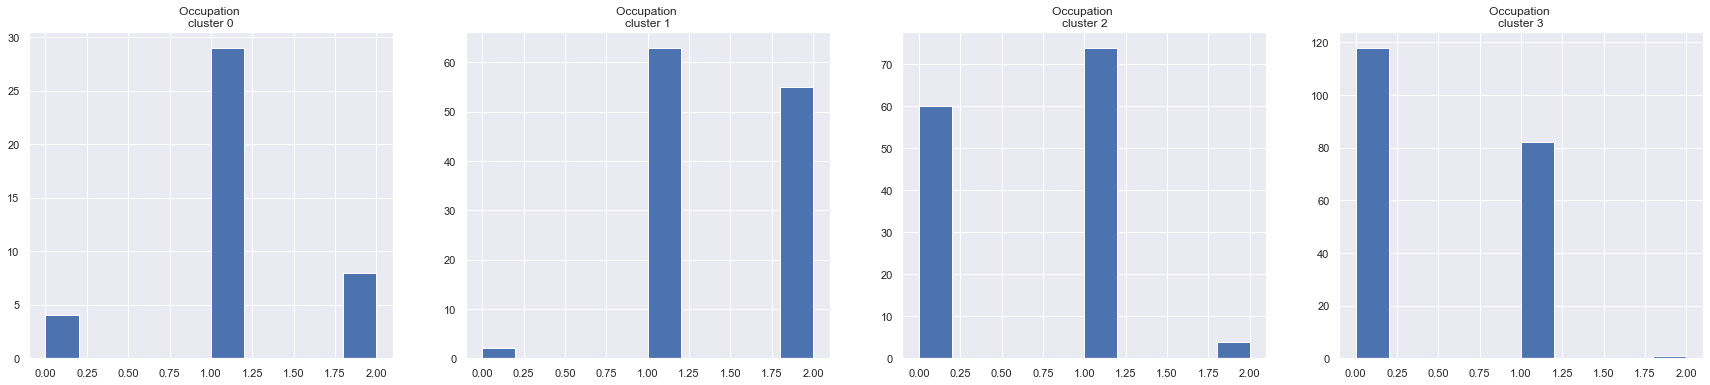

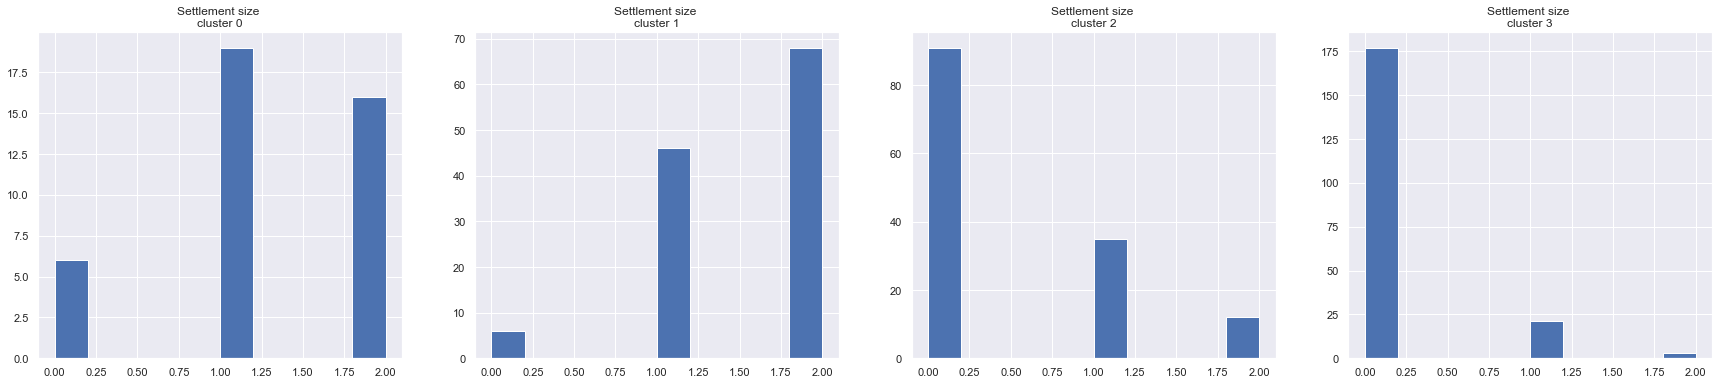

In [27]:
for i in dataset.columns[:11]:
    plt.figure(figsize=(30,6))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = dataset_with_clusters[dataset_with_clusters['segment k-means']==j]
        cluster[i].hist()
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

***Custer 0***  *are comprized of customers with high frequentation, most often buying high quantity of products. They are skilled employees for the most of them and live most in mid-size city. They constitute ***8%*** *of the customers population*.

***Cluster 1*** *is for customers visiting and buying less than cluster 0. Most of them are single male, graduated from high school and  University,living either in mid-size or in big city with high income. They represent ***24%*** *of customers*.

***Cluster 2*** *is for younger married customers, graduated from high school for most of them, either unemployed or official/skilled, and living in small city in majority, and just few of them in big city. They are ***27.6%*** *of population*.

***Cluster 4*** *is small city non married customers, unemployed for most of them, but with considerable part of officials,graduated the most from high school (with high proportion of unknown education level). They are ***40%*** *of population*.

### Visualization of segmented data based on KMeans clustering. ###

**Let's label each customer by its cluster**

In [28]:
dataset_segm_kmeans['Labels']=dataset_segm_kmeans['segment k-means'].map(dictionary_name)
dataset_segm_kmeans.head(10)

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment k-means,Labels
Customer_Id,,,,,,,,,,,,,
200000001,101,9,8.910891,0.178218,0,0,47,1,110866,1,0,3,Low_Access
200000002,87,11,12.643678,0.229885,1,1,52,2,159052,2,1,1,Wealthy_People
200000003,97,10,10.309278,0.185567,0,0,28,0,113212,1,0,3,Low_Access
200000004,85,11,12.941176,0.152941,0,0,37,1,119602,0,0,3,Low_Access
200000005,111,13,11.711712,0.189189,0,0,49,1,121466,1,2,1,Wealthy_People
200000006,86,10,11.627907,0.220930,0,0,39,1,112347,1,2,1,Wealthy_People
200000007,83,16,19.277108,0.349398,0,0,27,0,125190,2,1,3,Low_Access
200000008,97,15,15.463918,0.340206,0,0,26,0,131122,1,0,3,Low_Access
200000009,102,9,8.823529,0.107843,0,0,25,0,108960,0,0,3,Low_Access


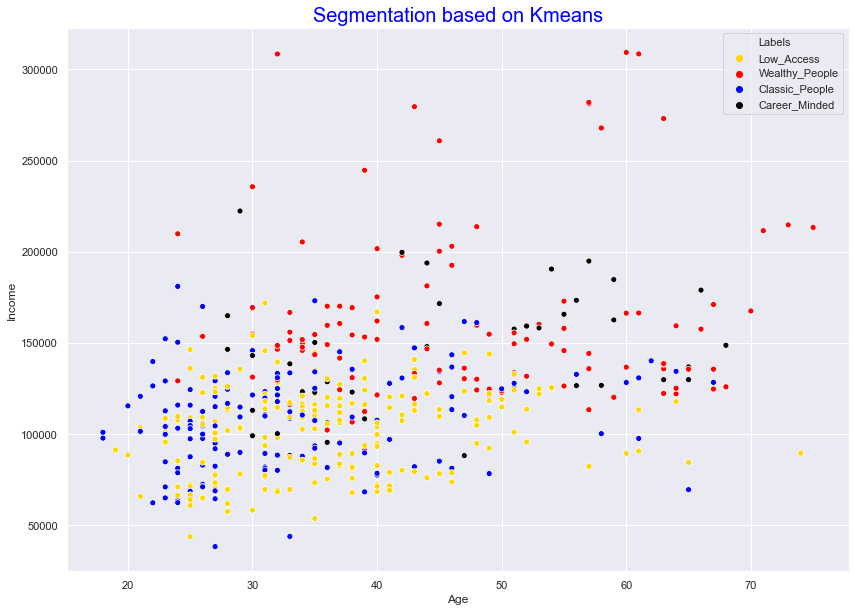

In [29]:
plt.figure(figsize=(14,10))
sns.scatterplot(dataset_segm_kmeans['Age'],dataset_segm_kmeans['Income'],hue= dataset_segm_kmeans['Labels'],palette=['Gold','red','blue','black'])
#hue= dataset_segm_kmeans['Labels'] allows to use segments as color
plt.title('Segmentation based on Kmeans', color='blue',fontsize=20)
plt.show()

***This is the scatter plot we got before, this time with each customer plot in his respective cluster. At this time, it's not obvious to have a separated view of each cluster. This is why we should use a dimensional reduction method for better visualization.***

***We'll focus specifically on a dimensional reduction method called PCA (Principal Components Analysis) This'll help to clear things up.***

***In addition, we'll use kmeans in combination with PCA for better clustering solution, than with the standard kmeans.***

## PCA method ##

In [30]:
pca=PCA()
pca.fit(dataset_std)

PCA()

*PCA actually creates many components which are the features of our data. Components are ranged in order of importance. to see the components, we need to call the explained_variance_ratio_ attribute on pca*

In [31]:
pca.explained_variance_ratio_

array([0.29296168, 0.19700529, 0.15070918, 0.11122408, 0.09004107,
       0.05425269, 0.04090698, 0.02340792, 0.02226775, 0.0135116 ,
       0.00371176])

**PCA applied a linear transformation on our data which created 11 new components. These 11 components put together explained 100% of the variability of the data, that's why components added up will sum up to 1. (the 1st component explaine 29% of variability of our data, the 2nd,19.7%).**

In [32]:
print(round(np.array(pca.explained_variance_ratio_).sum(),0))

1.0


***For the sake of dimensional reduction,we would use a certain number of components that will help to preserve the variance of observations.***

### How many components should we keep? ###

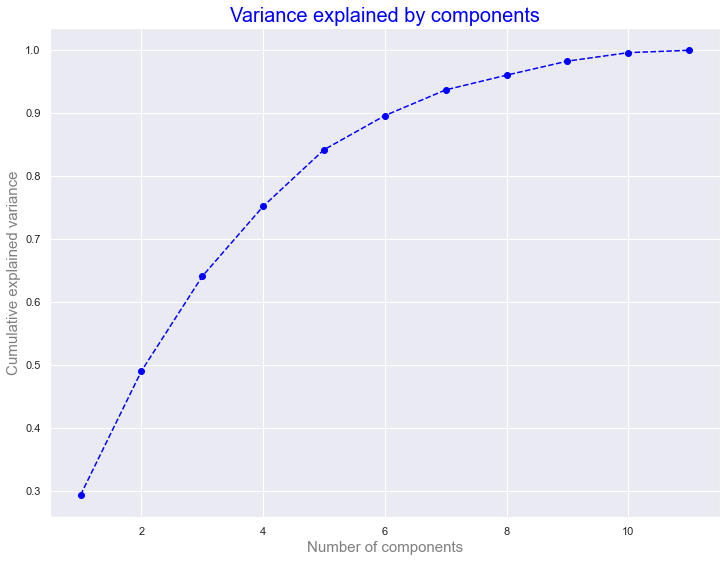

In [33]:
plt.figure(figsize=(12,9))
plt.plot(range(1,12),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--',color='blue')
plt.title('Variance explained by components', color='blue',fontsize=20)
plt.xlabel('Number of components', color='grey',fontsize=15)
plt.ylabel('Cumulative explained variance', color='grey',fontsize=15)
plt.show()

***The rule of thumb is to keep at least the number of components that correspond from 70 to 80% of the cumulative explained variance.***

At the first glance, ***4 is the good number to match this rule***

### Let's use 4 components as argument in PCA...###   
*and apply component attribute to have an idea.*

In [34]:
pca=PCA(n_components=4)
print(pca.fit(dataset_std))

PCA(n_components=4)


Let's obtain more informations about the 4 components that we've chosen (using the components_ attribute). The result is a 4x11 array. We reduce our features to 4 components from the original 11 components; that's explains the shape. This is called **Loading**, ***loading being a correlation between an original variable and a component. For instance, the 1st value of the array shows the loading of the 1st feature of the 1st component.***

In [35]:
pca.components_

array([[ 2.44403779e-01,  4.10513268e-01,  4.20597546e-01,
         3.40189350e-01, -5.40391003e-02,  6.83568373e-02,
         2.72105491e-01,  2.62238117e-01,  3.48172776e-01,
         3.15093132e-01,  3.28942984e-01],
       [ 3.07901478e-01,  4.12654238e-01,  3.51379800e-01,
         2.86053627e-01, -3.37910317e-02, -1.55227409e-01,
        -2.65845357e-01, -3.37664123e-01, -3.76510400e-01,
        -3.41929441e-01, -2.47011534e-01],
       [ 3.57129796e-02,  3.37015549e-02,  4.73915783e-02,
         9.45665176e-02,  6.19515318e-01,  5.86730296e-01,
         2.00551485e-02,  3.82864647e-01, -1.44213078e-01,
        -1.98287634e-01, -2.26374440e-01],
       [-7.87364601e-03,  8.31194537e-03,  1.85399768e-04,
        -2.61008955e-02, -2.02503763e-01, -3.37501245e-01,
         6.63127899e-01,  3.97426673e-01, -1.56266044e-01,
        -3.84635163e-01, -2.72438810e-01]])

In [36]:
dataset_pca_comp=pd.DataFrame(data=pca.components_,
                             columns=dataset.columns.values,
                             index=['component 1','component 2','component 3','component 4'])
dataset_pca_comp

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,0.244404,0.410513,0.420598,0.340189,-0.054039,0.068357,0.272105,0.262238,0.348173,0.315093,0.328943
component 2,0.307901,0.412654,0.351380,0.286054,-0.033791,-0.155227,-0.265845,-0.337664,-0.376510,-0.341929,-0.247012
component 3,0.035713,0.033702,0.047392,0.094567,0.619515,0.586730,0.020055,0.382865,-0.144213,-0.198288,-0.226374
component 4,-0.007874,0.008312,0.000185,-0.026101,-0.202504,-0.337501,0.663128,0.397427,-0.156266,-0.384635,-0.272439


***We have the correlation table between original variables and components. Values in the table go from -1 to 1. The closer the result is to zero, the lower the loading of the variable onto the corresponding component.***

### Nothing better than heatmap to visualize this ###

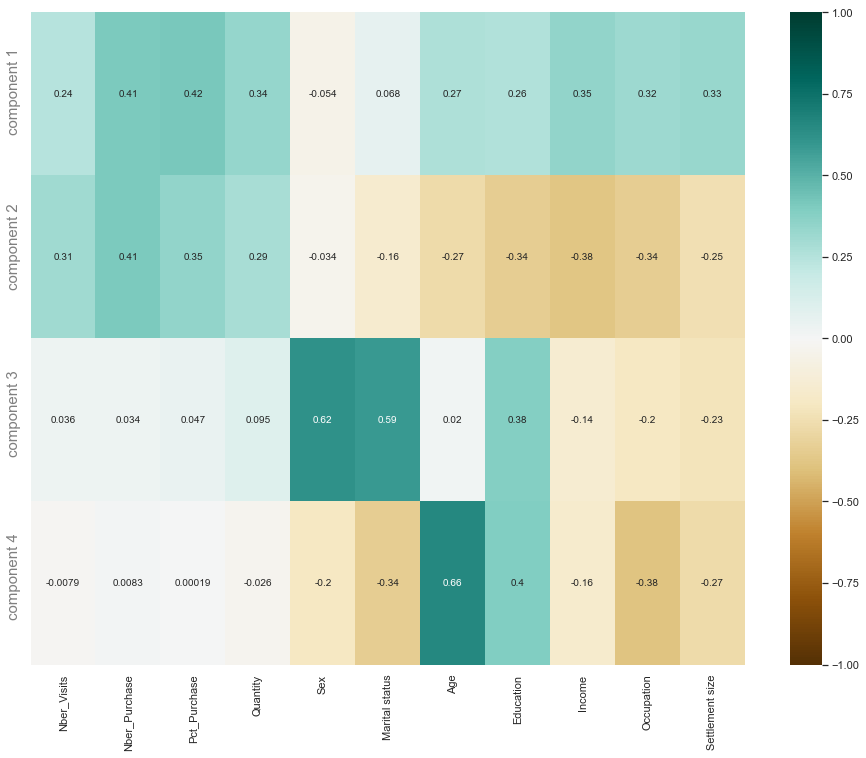

In [37]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='BrBG',
           annot=True)
plt.yticks([0,1,2,3],['component 1          ','component 2        ','component 3         ','component 4         '],
          fontsize=15,
          color='grey',
          rotation = 90)
plt.show()

***This gives us an idea of what variables each of components represent.*** *for example,component 3 represents Sex, Marital status and Education as those are the one correlating the more with this specific component.*

### The question now is how is our data related to this new features? our original data refers to the 11 original features, then it's 11D dataset. ###

**We must transform it into 4 Dimensional** using the built in ***tranform*** method of pca module

In [38]:
pca.transform(dataset_std) # This will help to get pca scores array

array([[-1.21165529, -0.83365031, -1.02224982,  0.97535171],
       [ 0.64839867, -3.1328485 ,  1.29175571, -0.35499918],
       [-1.99561518,  0.07364264, -1.64131436, -0.66961455],
       ...,
       [ 0.12120437,  0.72066784,  1.66512282, -1.16048184],
       [-1.09523038,  1.35815507,  0.86022934,  0.59705983],
       [-0.53465055, -0.12467899, -0.92811315,  0.63454333]])

In [39]:
pca_scores=pca.transform(dataset_std)

***The result is a new array where each observation is described by the 4 components***

### *We'll now perform Kmeans clustering based on pca scores* ###

***Note for this that there is no need to standardize pca scores as this array is standardized by definition.***

In [40]:
wcss=[]
for i in range(1,13):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

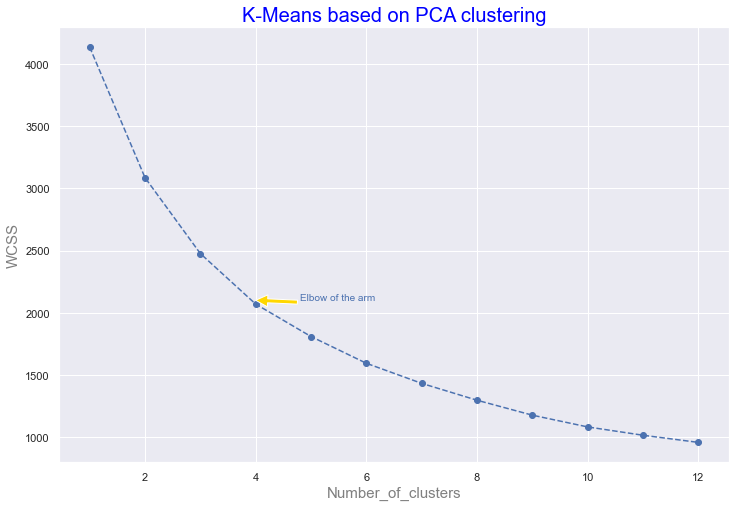

In [41]:
plt.figure(figsize=(12,8))
plt.plot(range(1,13),wcss,marker='o',linestyle='--')
plt.xlabel('Number_of_clusters', fontsize=15,color='grey')
plt.ylabel('WCSS', fontsize=15,color='grey')
plt.title('K-Means based on PCA clustering', fontsize=20,color='blue')
plt.annotate('Elbow of the arm',xy=(4,2100),xytext=(4+0.8,2100),arrowprops=dict(facecolor='Gold'),color ='b')
plt.show()

***The truth is out... We're still having 4 clusters even if there are differences between these 2 plots.***

In [42]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++', random_state=42)
kmeans_pca.fit(dataset_std)

KMeans(n_clusters=4, random_state=42)

## Let's explore the results in more details based on Kmeans PCA clustering ##
***We start by creating a new data frame as we did before adding the value of our new components(in the scores_pca variables) in our dataset***

In [43]:
dataset_segm_pca_kmeans=pd.concat([dataset.reset_index(drop=True),pd.DataFrame(pca_scores)], axis=1)

In [44]:
dataset_segm_pca_kmeans.columns.values[-4:]=['Component 1','Component 2','Component 3','Component 4'] 
dataset_segm_pca_kmeans['Segment k-means PCA']=kmeans_pca.labels_ 
pd.options.display.max_rows=500
dataset_segm_pca_kmeans

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segment k-means PCA
0,101,9,8.910891,0.178218,0,0,47,1,110866,1,0,-1.211655,-0.833650,-1.022250,0.975352,3
1,87,11,12.643678,0.229885,1,1,52,2,159052,2,1,0.648399,-3.132848,1.291756,-0.354999,1
2,97,10,10.309278,0.185567,0,0,28,0,113212,1,0,-1.995615,0.073643,-1.641314,-0.669615,3
3,85,11,12.941176,0.152941,0,0,37,1,119602,0,0,-1.856761,-0.265646,-0.784930,0.977300,3
4,111,13,11.711712,0.189189,0,0,49,1,121466,1,2,-0.019673,-1.361277,-1.600048,0.353406,1
5,86,10,11.627907,0.220930,0,0,39,1,112347,1,2,-0.574273,-1.375346,-1.616535,-0.151107,1
6,83,16,19.277108,0.349398,0,0,27,0,125190,2,1,-0.746809,-0.638761,-2.225950,-1.688240,3
7,97,15,15.463918,0.340206,0,0,26,0,131122,1,0,-1.596171,0.208793,-1.662310,-0.851996,3
8,102,9,8.823529,0.107843,0,0,25,0,108960,0,0,-2.619458,0.662014,-1.346826,-0.241891,3
9,98,15,15.306122,0.479592,0,0,32,0,69370,0,0,-2.372437,1.228271,-1.117117,0.276861,3


***To gain some insight, let's calculate the mean value of each feature by cluster, using groupby method***

In [45]:
dataset_segm_pca_kmeans_freq=dataset_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
dataset_segm_pca_kmeans_freq

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
Segment k-means PCA,,,,,,,,,,,,,,,
0,153.902439,101.731707,63.461563,1.806346,0.317073,0.414634,44.731707,1.292683,141805.219512,1.097561,1.243902,3.807265,2.041714,0.144518,-0.052114
1,114.291667,24.466667,21.970422,0.561037,0.125000,0.341667,47.041667,1.458333,162532.666667,1.441667,1.516667,1.175955,-1.523737,-0.798129,-0.022254
2,115.898551,23.195652,20.355690,0.624754,0.746377,1.000000,33.282609,1.253623,107669.260870,0.594203,0.427536,-0.515338,-0.100295,1.402104,-0.542124
3,112.805970,21.542289,19.184690,0.548918,0.313433,0.000000,36.149254,0.731343,102406.910448,0.417910,0.134328,-1.124855,0.562084,-0.515623,0.396121


***Now we can see the 4 cluters solution. Note that it's different than the one we got before. However, since the components are based on our original features and we still have 4 clusters, we'll expect them to be very similar with those we got with kmeans without PCA***

On the table above, are the means of components per segment. How do we get more out of them?

analyzing the segmented kmeans frequency above, this is how it match with our segment without PCA to identify our original clusters

        . Segment 0 looks like our wealthy_people segment without PCA
        . Segment 1 looks like our career_minded segment without PCA
        . Segment 2 looks like our classic_people segment without PCA
        . Segment 3 looks like our low_access segment without PCA

### how many people belongs to each cluster ### 
*(based on pca clustering)*

In [46]:
dataset_segm_pca_kmeans_freq['N obs']=dataset_segm_pca_kmeans[['Segment k-means PCA','Sex']].groupby(['Segment k-means PCA']).count()
dataset_segm_pca_kmeans_freq['Prop obs']=dataset_segm_pca_kmeans_freq['N obs']/dataset_segm_pca_kmeans_freq['N obs'].sum()
dataset_segm_pca_kmeans_freq=dataset_segm_pca_kmeans_freq.rename(dictionary_name)
dataset_segm_pca_kmeans_freq

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,N obs,Prop obs
Segment k-means PCA,,,,,,,,,,,,,,,,,
Career_Minded,153.902439,101.731707,63.461563,1.806346,0.317073,0.414634,44.731707,1.292683,141805.219512,1.097561,1.243902,3.807265,2.041714,0.144518,-0.052114,41,0.082
Wealthy_People,114.291667,24.466667,21.970422,0.561037,0.125000,0.341667,47.041667,1.458333,162532.666667,1.441667,1.516667,1.175955,-1.523737,-0.798129,-0.022254,120,0.240
Classic_People,115.898551,23.195652,20.355690,0.624754,0.746377,1.000000,33.282609,1.253623,107669.260870,0.594203,0.427536,-0.515338,-0.100295,1.402104,-0.542124,138,0.276
Low_Access,112.805970,21.542289,19.184690,0.548918,0.313433,0.000000,36.149254,0.731343,102406.910448,0.417910,0.134328,-1.124855,0.562084,-0.515623,0.396121,201,0.402


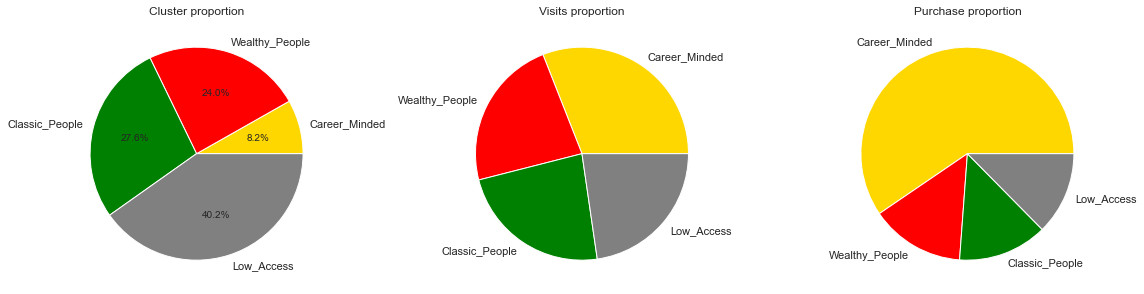

In [47]:
plt.figure(figsize=(16,12))

plt.subplot(1,3,1)
plt.pie(dataset_segm_pca_kmeans_freq['Prop obs'],labels=['Career_Minded','Wealthy_People','Classic_People','Low_Access'],
       autopct='%1.1f%%', colors =('Gold','Red','green','grey'))
plt.title('Cluster proportion')

plt.subplot(1,3,2)
plt.pie(dataset_segm_pca_kmeans_freq['Nber_Visits'],labels=['Career_Minded','Wealthy_People','Classic_People','Low_Access'],
       colors =('Gold','Red','green','grey'))
plt.title('Visits proportion')

plt.subplot(1,3,3)
plt.pie(dataset_segm_pca_kmeans_freq['Nber_Purchase'],labels=['Career_Minded','Wealthy_People','Classic_People','Low_Access'],
       colors =('Gold','Red','green','grey'))
plt.title('Purchase proportion')

plt.tight_layout()
plt.show()

## Some facts ##

***Career_Minded customers are the least represented (smallest cluster), but they are the one visiting the more and even purchasing the more.***

***Low_Access customers are the most represented, but with classic and Wealthy people, they tend to behave the same on frequentation and on purchase.***

#### Now, let's visualize our clusters on 2D dimension plan ###

***To do so, we'll use two out of our 4 components. They will constitute axis on the visualization chart. We absolutely sure, based on our rule of thumb, that the first 2 component explains the more the variance of our observations than the 3rd one.***

***Before that, let's add the name of the segments to the label as we did before and map the 4 clusters directly inside it.***

In [48]:
dataset_segm_pca_kmeans['Legends']=dataset_segm_pca_kmeans['Segment k-means PCA'].map(dictionary_name)
dataset_segm_pca_kmeans.head()

,Nber_Visits,Nber_Purchase,Pct_Purchase,Quantity,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segment k-means PCA,Legends
0,101,9,8.910891,0.178218,0,0,47,1,110866,1,0,-1.211655,-0.833650,-1.022250,0.975352,3,Low_Access
1,87,11,12.643678,0.229885,1,1,52,2,159052,2,1,0.648399,-3.132848,1.291756,-0.354999,1,Wealthy_People
2,97,10,10.309278,0.185567,0,0,28,0,113212,1,0,-1.995615,0.073643,-1.641314,-0.669615,3,Low_Access
3,85,11,12.941176,0.152941,0,0,37,1,119602,0,0,-1.856761,-0.265646,-0.784930,0.977300,3,Low_Access
4,111,13,11.711712,0.189189,0,0,49,1,121466,1,2,-0.019673,-1.361277,-1.600048,0.353406,1,Wealthy_People


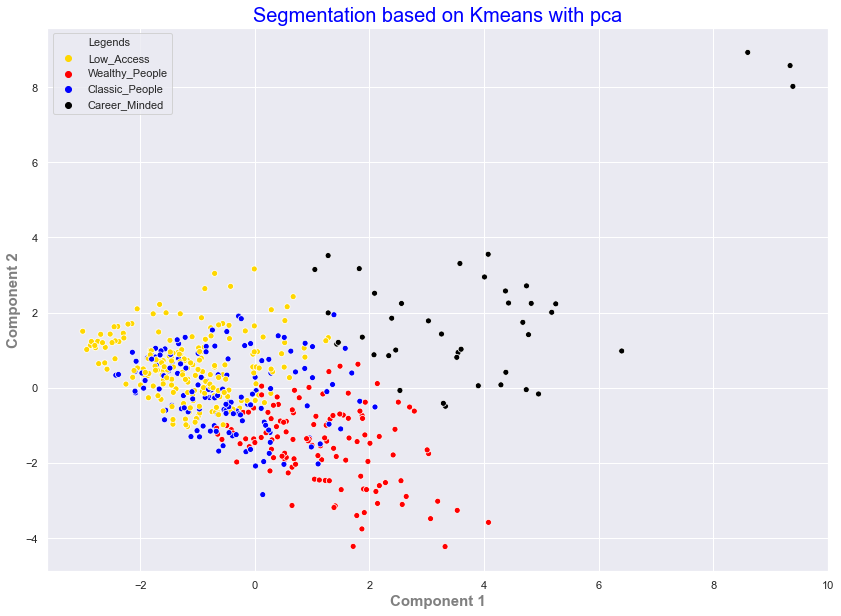

In [49]:
plt.figure(figsize=(14,10))
sns.scatterplot(dataset_segm_pca_kmeans['Component 1'],dataset_segm_pca_kmeans['Component 2'],hue= dataset_segm_pca_kmeans['Legends'],palette=['Gold','red','blue','black'])
#hue= dataset_segm_kmeans['Labels'] allows to use segments as color
plt.title('Segmentation based on Kmeans with pca', color='blue',fontsize=20)
plt.xlabel('Component 1', fontweight='bold',color='grey',fontsize='15')
plt.ylabel('Component 2', fontweight='bold',color='grey',fontsize='15')
plt.show()

***This is not quite interesting as wealthy, low_access and classic are mixed together, not allowing better exploration***

### Let's plot it in 3D for better visualization ###

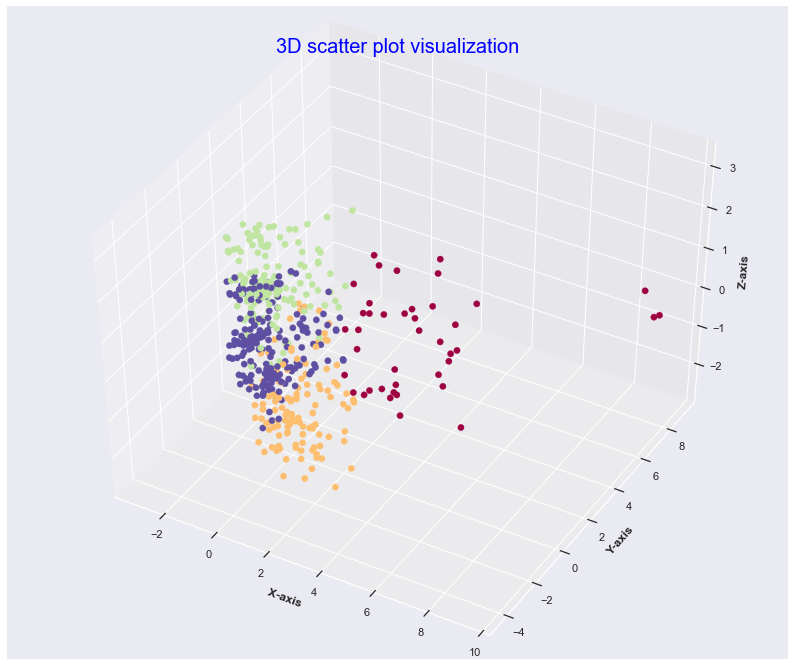

In [51]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')

x = np.array(dataset_segm_pca_kmeans['Component 1'])
y = np.array(dataset_segm_pca_kmeans['Component 2'])
z = np.array(dataset_segm_pca_kmeans['Component 3'])

ax.scatter(x,y,z, marker="o", c=dataset_segm_pca_kmeans["Segment k-means PCA"], s=40, cmap='Spectral',linewidth = 0.3,alpha=1)

plt.title("3D scatter plot visualization", color='blue', fontsize=20) 
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

ax.azim = 300
ax.elev = 45

plt.show()

# Overall Insights #

Quantity= 0.002661412262733217 *Num_Visits + 0.36345360770833224


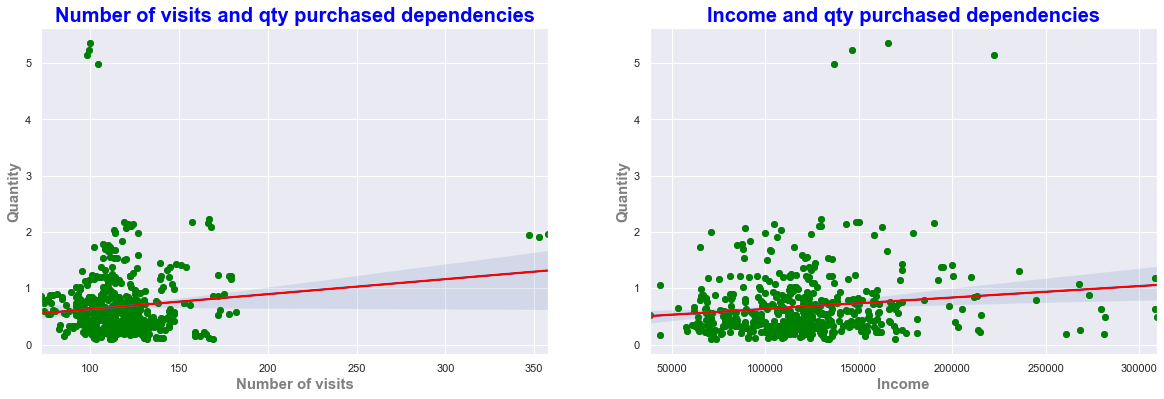

In [54]:
plt.figure(figsize=(20,6))
ax = plt.axes()
ax.set_facecolor("white")

V=dataset_segm_pca_kmeans['Nber_Visits']
Q=dataset_segm_pca_kmeans['Quantity']
I=dataset_segm_pca_kmeans['Income']

plt.subplot(1,2,1)
plt.plot(V,Q,'o',color ='green')
m,b = np.polyfit(V,Q,1)
sns.regplot(V, Q)

plt.plot(V,m*V + b, color='red')
plt.xlabel('Number of visits',color='grey', fontsize=15, fontweight='bold')
plt.ylabel('Quantity',color='grey', fontsize=15, fontweight='bold')
plt.title('Number of visits and qty purchased dependencies', color='blue', fontsize=20, fontweight='bold')
print('Quantity=',m,'*Num_Visits +',b)

plt.subplot(1,2,2)
plt.plot(I,Q,'o',color ='green')
m,b = np.polyfit(I,Q,1)
sns.regplot(I, Q)

plt.plot(I,m*I + b, color='red')
plt.xlabel('Income',color='grey', fontsize=15, fontweight='bold')
plt.ylabel('Quantity',color='grey', fontsize=15, fontweight='bold')
plt.title('Income and qty purchased dependencies', color='blue', fontsize=20, fontweight='bold')

plt.show()



<Figure size 1440x432 with 0 Axes>

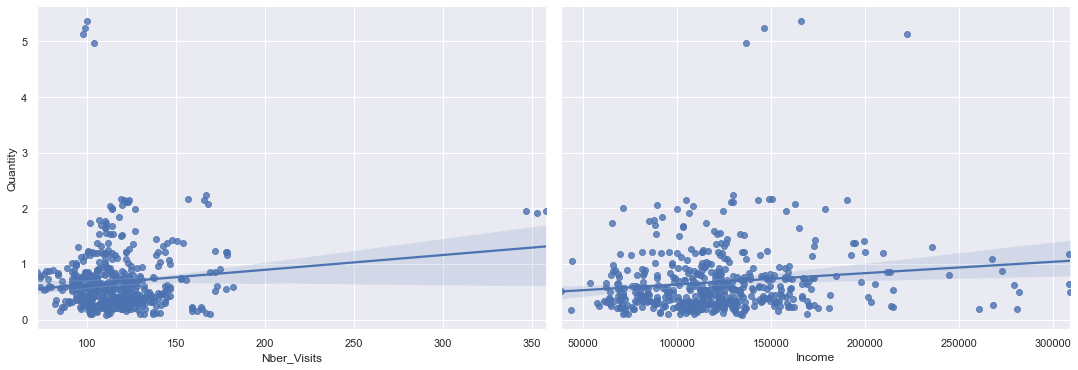

In [55]:
plt.figure(figsize=(20,6))
sns.pairplot(dataset_segm_pca_kmeans,x_vars=['Nber_Visits','Income'],y_vars='Quantity',height=5, aspect=1.5, kind='reg')
plt.show()

### 1. An increase of 1 unit of the visit will increase the quantity by 0.37, with everything else remaining equal. To increase the quantity by 10%, we'll need the number of visits to be increased by 27%, without taking into account different clusters. ###

### 2. Most career_minded visiting the store will lead to more purchase, as it's been shown that this group is the one with more visits and more purchase, but the smallest proportion of our customers (only 8.2% of them). These are top purchasers. Promoting more male items in the store will help to rise up the visit frequency of this group and will impact the purchase frequency and the quantity. More strategically, changing the store location to a mid_size city will allow targeting more of these customers.###

### 3. Wealthy, low_access and classic_people visit the store and purchase almost at the same proportion. Low_access is the most represented cluster (40.2%). The real catchment area of the store deems to be rural. They represent the more, but with less impact on quantity purchased. promoting more low prices product line as lead product will provide more purchase from this group and inverse the trend.###

### 4. The price elasticity on demand is not more to be proved as it's all about chocolate which deems to be an elastic product. Price reduction and/or diverse promotion campaign will lead to more purchased quantities###